<a href="https://colab.research.google.com/github/OA21796/L3T1/blob/main/EDAv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving heart.csv to heart (47).csv


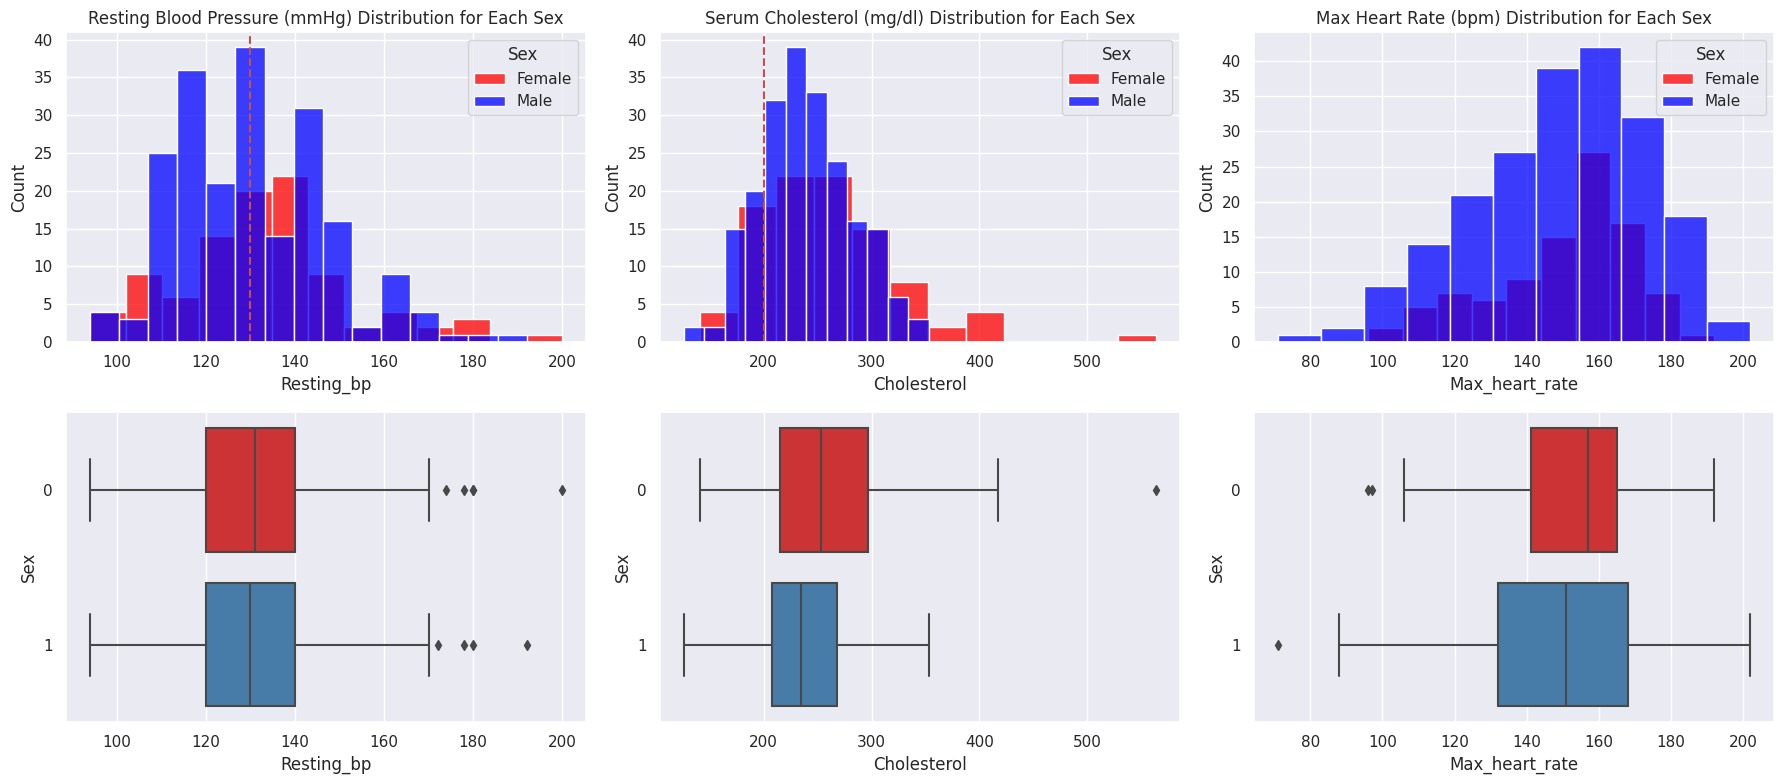

In [ ]:
# Importing the relevant libraries required for use to display and query dataset
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import plotly.graph_objs as go
import plotly.offline as py

from google.colab import files


def readData():
  """ reads and returns the csv """
  heart_data = pd.read_csv("heart.csv")
  return heart_data

def renameColumns(HD):
  """ Renames the columns to a better understood column name """
  HD.columns = ['Age', 'Sex', 'Chest_pain_type', 'Resting_bp',
              'Cholesterol', 'Fasting_bs', 'Resting_ecg',
              'Max_heart_rate', 'Exercise_induced_angina',
              'ST_depression', 'ST_slope', 'Num_major_vessels',
              'Thallium_test', 'Condition',
              ]
  return HD

def printHead(HD):
  """ Previews the dataset """
  print(HD.head())

def describeData(HD):
  """ DescribeData takes in the csv, and prints a summary of the following:
     -> count             -> min
     -> mean              -> 25% percentile
     -> std               -> 50% percintile
     -> 75% percintile    -> max val """

  print(HD.describe())

def infoData(HD):
  """ This prints the data types, memory usage, no. of features, and no. of entries made """
  HD.info() # prints numbered row by row with datatype, and non null count.
  print()
  print(f'Shape of the dataset')
  print(f'Number of Features: {HD.shape[1]}')
  print(f'Number of Observations: {HD.shape[0]}')
  # the print statements return the numb of columns and no of entries. f" formatted


def checkMissingValues(HD):
  """ This checks for missing values in any row """
  print("{:<8}\033[1m Missing values".format(" "))
  print(HD.isnull().sum())
  # At current there are no missing values in the dataset

def conditionPieChart(data):
    """
    Make a pie chart of 'Condition' values
    Condition: 0 = Benign, 1 = Malignant
    0 means they do NOT have heart disease. 1 is opposite.
    """
    results = data['Condition'].value_counts()
    values = [results[0], results[1]]
    labels = ['Benign', 'Malignant']
    colors = ['lime', 'red']

    fig_pie = go.Pie(labels=labels, values=values,
                     marker={'colors': colors,
                             'line': {'color': 'Black', 'width': 2}})
    py.iplot([fig_pie])
    print(py)
    print("\nObservations: Most of tumors are diagnosed with Malignant, 54.5% (165 cases)."
    "On the other hand, the proportion of Benign in Condition is less than 50%.")

def sex_ratio(data):
  """
  Make a pie chart of 'Sex' values
  Sex: 0 = Female, 1 = Male
  A pie chart displaying the ratio between men and women
  """
  print("{:<55}\033[1m Pie Chart showing ratio between Men:Women".format(" "))
  # Pie chart of sex ratio
  results = data['Sex'].value_counts()
  values = [results[0], results[1]]
  labels = ['Female', 'Male']
  colors = ['Red', 'RoyalBlue']

  fig_pie = go.Pie(labels=labels, values=values,
                    marker={'colors': colors,
                            'line': {'color': 'Black', 'width': 2}})
  py.iplot([fig_pie])
  print(py)


def conditionPerSex(data):
    """
    Plot a bar chart of the proportion of Conditon vs.  Sex.
    Show the percentage of Malignant for each sex.
    """
    # Bivariate analysis: Sex vs. Condition
    data['Sex'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Sex', y='proportion', hue='Condition', palette='Dark2');
    plt.title('Proportion of Condition for Sex')
    plt.xlabel('Sex (0 = Female, 1 = Male)')
    plt.show()


    # Show the percentage of Malignant for Sex
    # female_malignant vs. Malignant
    female_malignant = data[data['Sex']==0]['Condition'].sum()/data[data['Condition']==1]['Condition'].count()
    # male_malignant vs. Malignant
    male_malignant = data[data['Sex']==1]['Condition'].sum()/data[data['Condition']==1]['Condition'].count()

    print('The proportion of Malignant for Sex:')
    print(f'Female: {female_malignant:.2%}')
    print(f'Male: {male_malignant:.2%}')
    # I may only need the percentages and not the bar chart??


def riskFactors_bySex(data):
    """
    Show distributions of risk factors for each sex
    Risk factors include:
     -> Resting blood pressure
     -> Chloestrerol level
     -> Max heart rate
    All presented with a distribution table and standard deviation graph***
    """
    fig = plt.figure(figsize=(18, 8))

    # Resting blood pressure for each sex
    plt.subplot(2, 3, 1)
    trestbps_female = data[data['Sex']==0]['Resting_bp']
    trestbps_male = data[data['Sex']==1]['Resting_bp']
    sns.histplot(trestbps_female, color='Red')
    sns.histplot(trestbps_male, color='Blue')
    plt.title('Resting Blood Pressure (mmHg) Distribution for Each Sex')
    plt.gca().legend(title='Sex', labels=['Female','Male'])
    plt.axvline(x=130, color='r', linestyle='--', label='Hypertension: over 130 mmHg')

    plt.subplot(2, 3, 4)
    sns.boxplot(x=data['Resting_bp'], y=data['Sex'],
                palette='Set1', orient='h')


    # Serum cholesterol distribution for each sex
    plt.subplot(2, 3, 2)
    chol_female = data[data['Sex']==0]['Cholesterol']
    chol_male = data[data['Sex']==1]['Cholesterol']
    sns.histplot(chol_female, color='Red')
    sns.histplot(chol_male, color='Blue')
    plt.title('Serum Cholesterol (mg/dl) Distribution for Each Sex')
    plt.gca().legend(title='Sex', labels=['Female','Male'])
    plt.axvline(x=200, color='r', linestyle='--', label='High Cholesterol: over 200 mg/dl')

    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['Cholesterol'], y=data['Sex'],
                palette='Set1', orient='h')


    # Max heart rate distribution for each sex
    plt.subplot(2, 3, 3)
    thalach_female = data[data['Sex']==0]['Max_heart_rate']
    thalach_male = data[data['Sex']==1]['Max_heart_rate']
    sns.histplot(thalach_female, color='Red')
    sns.histplot(thalach_male, color='Blue')
    plt.title('Max Heart Rate (bpm) Distribution for Each Sex')
    plt.gca().legend(title='Sex', labels=['Female','Male'])

    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['Max_heart_rate'], y=data['Sex'],
                palette='Set1', orient='h')

    plt.tight_layout()
    plt.show()

# PAUSED AT 4-3. Risk Factors for Developing Heart Disease [15]




def __main__():
  """ this function will hold the main functions required to run this file """
  uploaded = files.upload() #           this is how googlCollab allows files to be uploaded
  HD = readData() #                     HD is now the CSV file I will be querying.
  HD = renameColumns(HD) #              renames the columns to something more readable
  # describeData(HD) #                    prints a summary of numeric statistics
  # infoData(HD) #                        prints the csv schema
  # checkMissingValues(HD) #              prints & checks for any missing values in any columns.
  # conditionPieChart(HD) #               prints a pie chart that shows the ratio between malignant and benign patients
  # sex_ratio(HD) #                       prints a pie chart that shows the ratio between men and women
  # conditionPerSex(HD) #                 prints a bar char that shows the proportion of malginant to benign per male and female patients
  # riskFactors_bySex(HD) #               prints 6 distribution tables that detail the risk factors in both men and women that include max heart rate, serum cholestrol level and resting-bp




if __name__ == "__main__":
  __main__()







